#Install Package

In [15]:
!pip install beautifulsoup4 black \
    tiktoken \
    openai \
    unstructured \
    nltk \
    fastapi \
    jinja2 \
    uvicorn \
    streamlit \
    streamlit-chat \
    tqdm \
    isort \
    langchainhub \
    firecrawl-py \
    langchain-community \
    langsmith \
    pillow \
    langchain-tavily \
    langchain-pinecone \
    certifi \
    python-dotenv \
    ipykernel \
    sentence-transformers \
    pinecone \
    langchain-groq \
    langchain-huggingface  -q
    ##langchain-chroma

In [2]:
#!pip install langchain-mistralai

#Mount Google Drive

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Navigate to your project folder in Drive

%cd /content/drive/MyDrive/Colab Notebooks/


/content/drive/My Drive/Colab Notebooks


In [29]:
!ls -a "/content/drive/My Drive/Colab Notebooks//Langchain/documentation-helper"

 backend.py	   '.gitignore_from course'   main.py
 .chainlit	    ingestion_old1.py	      Pipfile
 doc_helper.ipynb   ingestion_old2.py	      Pipfile.lock
 .env		    ingestion_old.py	      __pycache__
 .files		    ingestion.py	      README.md
 .git		    LICENSE		     'Tavily Crawl Demo Tutorial.ipynb'
 .gitignore	    logger.py		     'Tavily Demo Tutorial.ipynb'


#Main.py

In [ ]:
!python Langchain/documentation-helper/backend.py

#Streamlit App

In [5]:
!pip install streamlit  -q

In [30]:
#!python Langchain/documentation-helper/main.py

In [6]:
%cd /content/drive/My Drive/Colab Notebooks/Langchain/documentation-helper/

/content/drive/My Drive/Colab Notebooks/Langchain/documentation-helper


In [14]:
!pip install streamlit pyngrok -q

import os, threading
from pyngrok import ngrok

#Set ngrok auth token (replace with your own)
ngrok.set_auth_token("33n9JvQ1BViXDrutPz2sewEGY6b_3nPU8tayTfzxRapC7FxBM")

# dir location to where main.py is
os.chdir("/content/drive/MyDrive/Colab Notebooks/Langchain/documentation-helper")

#port Streamlit will use
port = 8501

#Function to start Streamlit app
def run_streamlit():
    os.system(f"streamlit run main.py --server.port {port}")

# Start Streamlit in a background thread
thread = threading.Thread(target=run_streamlit)
thread.start()

# Create ngrok tunnel to the same port
public_url = ngrok.connect(port)
print("🌍 Your Streamlit App is Live Here:", public_url)


🌍 Your Streamlit App is Live Here: NgrokTunnel: "https://brankiest-sharen-unguled.ngrok-free.dev" -> "http://localhost:8501"



✅ Diagram successfully generated and saved as: rag_groq_pinecone_architecture.png

--- Visual Output ---


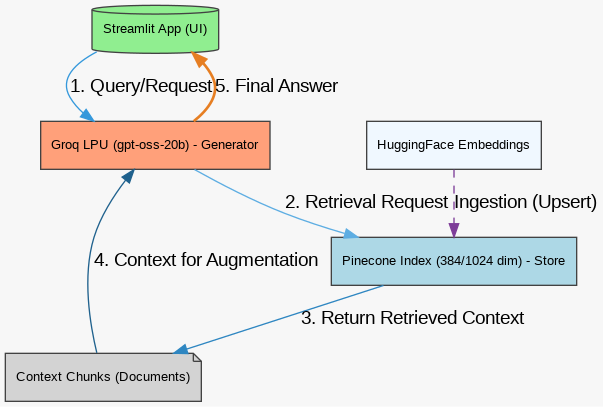


To download the image file, click the link below:


In [35]:
import graphviz
import os
# FIX: Import Image to display the generated PNG data directly in the notebook
from IPython.display import display, HTML, Image

def generate_rag_diagram(output_filename="rag_groq_pinecone_architecture.png"):
    """
    Generates a RAG architecture diagram highlighting Streamlit, Groq, and Pinecone.
    """
    # 1. Initialize the Graphviz directed graph object
    dot = graphviz.Digraph(
        comment='RAG Architecture (Groq + Pinecone)',
        graph_attr={
            'rankdir': 'TB', # Top to Bottom flow
            'bgcolor': '#f7f7f7',
            'fontname': 'Helvetica',
            'fontsize': '11'
        },
        node_attr={
            'shape': 'box',
            'style': 'filled',
            'fontname': 'Helvetica',
            'fontsize': '10',
            'color': '#424242'
        }
    )

    # 2. Define Components (Nodes)
    dot.node('UI', 'Streamlit App (UI)', fillcolor='#90EE90', shape='cylinder')
    dot.node('LLM', 'Groq LPU (gpt-oss-20b) - Generator', fillcolor='#FFA07A')
    dot.node('DB', 'Pinecone Index (384/1024 dim) - Store', fillcolor='#ADD8E6', shape='database')
    dot.node('Embed', 'HuggingFace Embeddings', fillcolor='#F0F8FF', shape='box')
    dot.node('Chunks', 'Context Chunks (Documents)', fillcolor='#D3D3D3', shape='note')

    # 3. Define the Flow (Edges)

    # User Interaction Flow
    dot.edge('UI', 'LLM', '1. Query/Request', fontname='Helvetica', color='#3498DB')

    # Retrieval Path
    dot.edge('LLM', 'DB', '2. Retrieval Request', fontname='Helvetica', color='#5DADE2')
    dot.edge('DB', 'Chunks', '3. Return Retrieved Context', fontname='Helvetica', color='#2E86C1', arrowhead='normal')
    dot.edge('Chunks', 'LLM', '4. Context for Augmentation', fontname='Helvetica', color='#1F618D')

    # Embedding Path (Implicit, usually done during ingestion)
    dot.edge('Embed', 'DB', 'Ingestion (Upsert)', fontname='Helvetica', style='dashed', color='#7D3C98')

    # Generation Path
    dot.edge('LLM', 'UI', '5. Final Answer', fontname='Helvetica', color='#E67E22', penwidth='2')

    # 4. Render and Display the File

    # Generate the PNG data in memory
    png_data = dot.pipe(format='png')

    # Save file to disk (keeps the download link functional)
    base_name = output_filename.replace('.png', '')
    final_filepath = f"{base_name}.png"
    with open(final_filepath, 'wb') as f:
        f.write(png_data)

    print(f"\n✅ Diagram successfully generated and saved as: {final_filepath}")

    # --- FIX: Display the PNG data directly using IPython.display.Image ---
    print("\n--- Visual Output ---")
    display(Image(data=png_data))

    # Provide the download link as a fallback
    html_link = f'<a href="{final_filepath}" download="{final_filepath}">Click here to download {final_filepath}</a>'
    print("\nTo download the image file, click the link below:")
    display(HTML(html_link))
    # --- END FIX ---


if __name__ == "__main__":
    generate_rag_diagram()